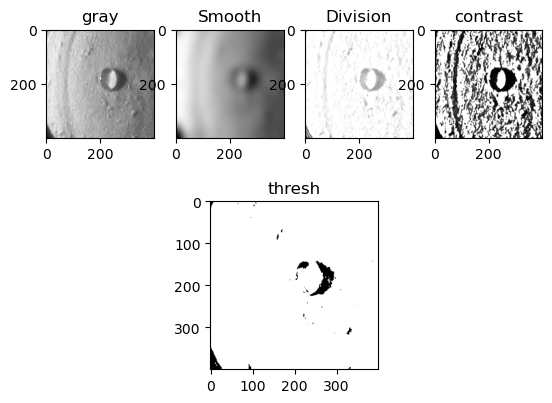

In [3]:
import cv2
import numpy as np
import skimage.filters as filters
from matplotlib import pyplot as plt

# read the image
image = cv2.imread('test_R.jpg')

# convert to gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# blur
smooth = cv2.GaussianBlur(gray, (95, 95), 0)

# divide gray by enhanced contrast
division = cv2.divide(gray, smooth, scale=255)

# enhance contrast
enhanced_contrast = cv2.equalizeHist(division)

# threshold
threshold = 5
thresh = cv2.threshold(enhanced_contrast, threshold, 255, cv2.THRESH_BINARY)[1]

plt.subplot(241), plt.imshow(gray, 'gray'), plt.title('gray')
plt.subplot(242), plt.imshow(smooth, 'gray'), plt.title('Smooth')
plt.subplot(243), plt.imshow(division, 'gray'), plt.title('Division')
plt.subplot(244), plt.imshow(enhanced_contrast, 'gray'), plt.title('contrast')
plt.subplot(212), plt.imshow(thresh, 'gray'), plt.title('thresh')
plt.show()


In [30]:
# Divide the image into upper, lower, left, and right halves
height, width = thresh.shape[:2]
upper_half = thresh[:height//2, :]
lower_half = thresh[height//2:, :]
left_half = thresh[:, :width//2]
right_half = thresh[:, width//2:]

# Calculate the number of dark pixels in each region
upper_dark_pixels = np.sum(upper_half == 0)
lower_dark_pixels = np.sum(lower_half == 0)
left_dark_pixels = np.sum(left_half == 0)
right_dark_pixels = np.sum(right_half == 0)

# Compare the number of dark pixels
dark_pixel_counts = {
    "upper": upper_dark_pixels,
    "lower": lower_dark_pixels,
    "left": left_dark_pixels,
    "right": right_dark_pixels
}

# Find the darkest position
darkest_position = max(dark_pixel_counts, key=dark_pixel_counts.get)

# Print the result
print(f"Darkest position: {darkest_position} ({dark_pixel_counts[darkest_position]} dark pixels)")


Darkest position: right (4738 dark pixels)
